In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df1 = df

In [10]:
df1.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model year  origin  car name                            
9.0   8          304.0         193         4732    18.5          70          1       hi 1200d                                1
27.0  4          151.0         90          2950    17.3          82          1       chevrolet camaro                        1
                 140.0         86          2790    15.6          82          1       ford mustang gl                         1
                 112.0         88          2640    18.6          82          1       chevrolet cavalier wagon                1
                 101.0         83          2202    15.3          76          2       renault 12tl                            1
                                                                                                                            ..
18.6  6          225.0         110         3620    18.7          78          1       dodge aspen                    

In [11]:
df1 = df1.drop(columns = ['car name', 'horsepower'], axis = 1)

In [12]:
df1.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


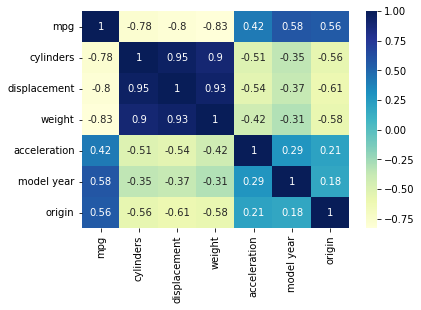

In [13]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

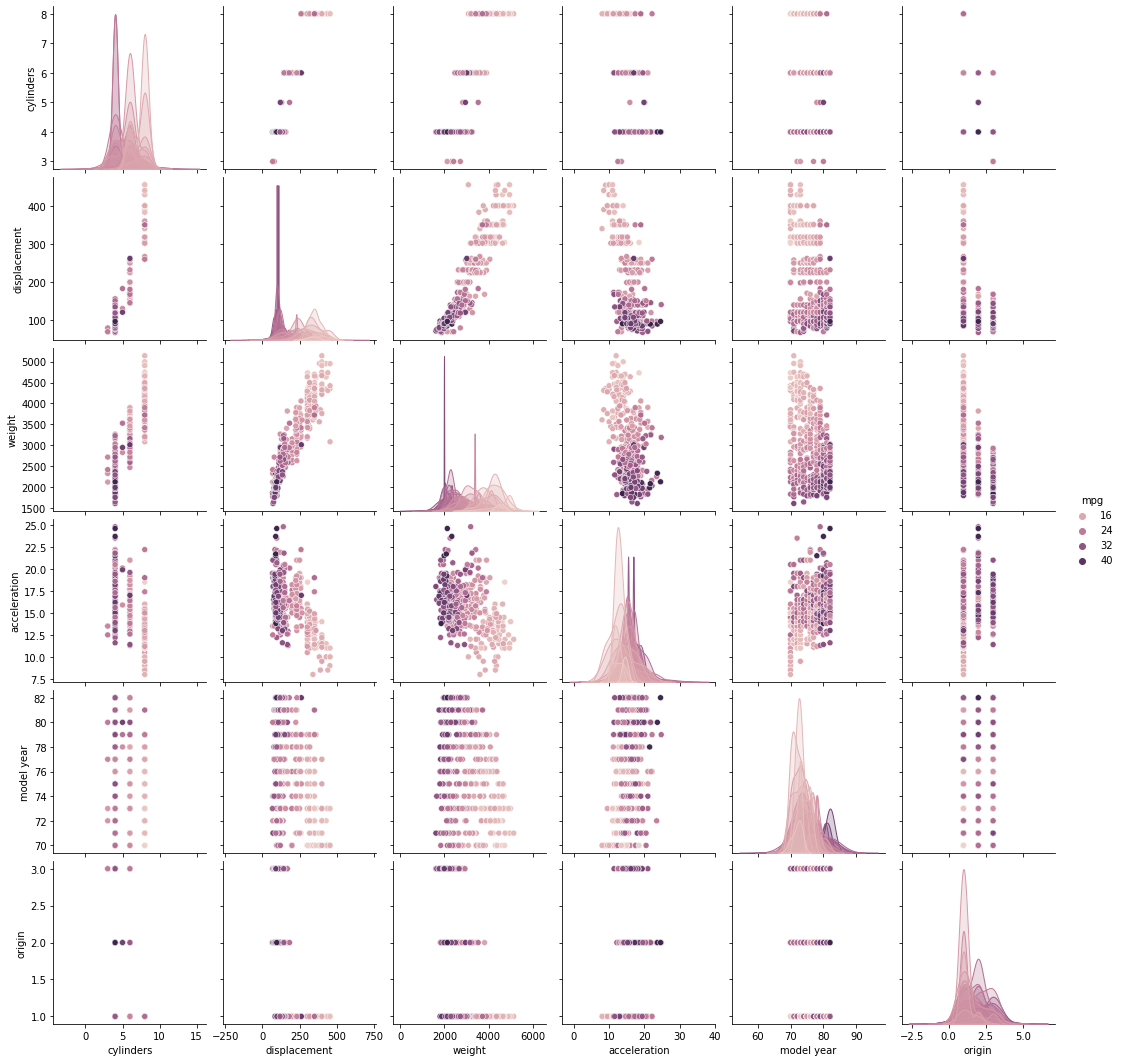

In [14]:
sns.pairplot(df1, hue = 'mpg')

In [15]:
Q1 = df1.quantile(0.1)
Q3 = df1.quantile(0.9)
IQR = Q3 - Q1
print(IQR)

mpg               20.33
cylinders          4.00
displacement     260.00
weight          2286.70
acceleration       7.00
model year        10.00
origin             2.00
dtype: float64


In [17]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)

(398, 7)


In [18]:
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [19]:
#Step 1: Import the ML model from library

from sklearn.linear_model import LinearRegression

#Step 2: Initiate the ML model

linear_model = LinearRegression()


#Step 3: Split the data into trainnig and testing data

X = df2.drop(['mpg'], axis=1)
y = df2[['mpg']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 20)

In [20]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (298, 6)
Number transactions y_train dataset:  (298, 1)
Number transactions X_test dataset:  (100, 6)
Number transactions y_test dataset:  (100, 1)


In [22]:
from sklearn.metrics import r2_score


  
# train the model on train set
linear_model.fit(X_train, y_train)
  
predictions = linear_model.predict(X_test)
  
# print classification report
print(r2_score(y_test, predictions))

0.8206218518465453
